In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
col_names = ['User_name','Tweets_text', 'Source']
tweets_df = pd.read_csv('data_tweets.csv', header=None, names=col_names)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16936 entries, 0 to 16935
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    16936 non-null  object
 1   Tweets_text  16936 non-null  object
 2   Source       16904 non-null  object
dtypes: object(3)
memory usage: 397.1+ KB


In [3]:
tweets_df[tweets_df['Tweets_text'].duplicated(keep=False)].sort_values('Tweets_text').head(8)

,User_name,Tweets_text,Source
15561,MacaesBruno,805 Covid deaths in Germany today. Now well ab...,"<a href=""http://twitter.com/#!/download/ipad"" ..."
16434,BrunoBotMacaes,805 Covid deaths in Germany today. Now well ab...,"<a href=""http://www.changeitlater.com"" rel=""no..."
12009,KCchemguy,Agreed,"<a href=""http://twitter.com/download/iphone"" r..."
3454,DingDon47296742,Agreed,"<a href=""http://twitter.com/download/iphone"" r..."
3223,ianrobo1,Been catching up on this ... Esther was great,"<a href=""http://twitter.com/download/iphone"" r..."
8042,ianrobo1,Been catching up on this ... Esther was great,"<a href=""https://about.twitter.com/products/tw..."
8674,deahuq1,Check out my Gig on Fiverr: do black and white...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
12097,deahuq1,Check out my Gig on Fiverr: do black and white...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [4]:
tweets_df = tweets_df.drop_duplicates('Tweets_text')
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 0 to 16934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    10558 non-null  object
 1   Tweets_text  10558 non-null  object
 2   Source       10530 non-null  object
dtypes: object(3)
memory usage: 329.9+ KB


==> as we can see in our dataFrame there is rows that has null value so we need first to dispose these rows so that we can work on equal rows/columns

In [5]:
#First replace all the empty rows with NAN value 
tweets_df['Source'].replace('', np.nan, inplace=True)
#Then we drop those rows
tweets_df.dropna(subset=['Source'], inplace=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 16934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    10530 non-null  object
 1   Tweets_text  10530 non-null  object
 2   Source       10530 non-null  object
dtypes: object(3)
memory usage: 329.1+ KB


In [6]:
tweets_df.head()

,User_name,Tweets_text,Source
0,sectest9,RT @Arcserve: 2020 saw rampant #cyberattacks o...,"<a href=""https://ho.com"" rel=""nofollow"">auto i..."
1,pizza_czar,RT @TMZ: Viral 'Dreams' Skateboarder Nathan Ap...,"<a href=""http://twitter.com/download/iphone"" r..."
2,stubbysquid,Ok so I just talked to my doctor and because a...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,MikePShanahan,What he means to say: ‘ COVID part one went re...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,jennicat777,RT @drdavidsamadi: I feel like I’ve been repea...,"<a href=""http://twitter.com/download/android"" ..."


In [7]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+',  '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# Clean the tweets
tweets_df['Tweets_text'] = tweets_df['Tweets_text'].apply(cleanTxt)
tweets_df['Tweets_text'] = tweets_df['Tweets_text'].apply(deEmojify)

# Show the cleaned tweets
tweets_df.head(10)

,User_name,Tweets_text,Source
0,sectest9,2020 saw rampant cyberattacks on US hospitals...,"<a href=""https://ho.com"" rel=""nofollow"">auto i..."
1,pizza_czar,Viral Dreams Skateboarder Nathan Apodaca Tes...,"<a href=""http://twitter.com/download/iphone"" r..."
2,stubbysquid,Ok so I just talked to my doctor and because a...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,MikePShanahan,What he means to say COVID part one went re...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,jennicat777,I feel like I ve been repeating myself quite a...,"<a href=""http://twitter.com/download/android"" ..."
5,the_real_tsnutz,Mitch McConnell and Republicans want to block ...,"<a href=""http://twitter.com/download/iphone"" r..."
7,MsActiviss,Memorable Trump Lies Inject disinfectant for...,"<a href=""http://twitter.com/download/android"" ..."
8,order_personal,CDC Reveals Hospitals Counted 130 000 Heart At...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
9,PRKramer1,Ohio State Faithful Not Happy With Michigan Fo...,"<a href=""http://twitter.com/download/android"" ..."
10,EcoHubb,Concentrations of methane surged by a near rec...,"<a href=""http://twitter.com/download/android"" ..."


In [8]:
#Create a new csv file with the cleande tweets
tweets_df = tweets_df.set_index('Tweets_text') 
tweets_df.to_csv('clean_txeets_text.csv')

In [9]:
df = pd.read_csv('clean_txeets_text.csv')
#First replace all the empty rows with NAN value 
df['Tweets_text'].replace('', np.nan, inplace=True)
#Then we drop those rows
df.dropna(subset=['Tweets_text'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 0 to 10529
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets_text  10529 non-null  object
 1   User_name    10529 non-null  object
 2   Source       10529 non-null  object
dtypes: object(3)
memory usage: 329.0+ KB


# NLTK (Natural Language Toolkit) is one of the best library for preprocessing text data.

In [10]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package wordnet to /home/oumaima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oumaima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/oumaima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def preprocess_data(data):
    #Removes Numbers
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer =  TweetTokenizer()
    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words
    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    return pd.DataFrame(words)

pre_tweets = preprocess_data(df['Tweets_text'])
df['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 0 to 10529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets_text  10529 non-null  object
 1   User_name    10529 non-null  object
 2   Source       10529 non-null  object
 3   text         10529 non-null  object
dtypes: object(4)
memory usage: 411.3+ KB


In [13]:
df.head()

,Tweets_text,User_name,Source,text
0,2020 saw rampant cyberattacks on US hospitals...,sectest9,"<a href=""https://ho.com"" rel=""nofollow"">auto i...","[saw, rampant, cyberattacks, u, hospital, heal..."
1,Viral Dreams Skateboarder Nathan Apodaca Tes...,pizza_czar,"<a href=""http://twitter.com/download/iphone"" r...","[viral, dream, skateboarder, nathan, apodaca, ..."
2,Ok so I just talked to my doctor and because a...,stubbysquid,"<a href=""https://mobile.twitter.com"" rel=""nofo...","[ok, talked, doctor, friend, sent, link, takin..."
3,What he means to say COVID part one went re...,MikePShanahan,"<a href=""https://mobile.twitter.com"" rel=""nofo...","[mean, say, covid, part, one, went, really, re..."
4,I feel like I ve been repeating myself quite a...,jennicat777,"<a href=""http://twitter.com/download/android"" ...","[feel, like, repeating, quite, bit, still, mes..."


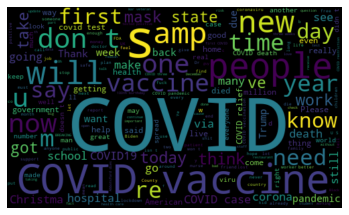

In [14]:
from wordcloud import WordCloud
#WordCloud visualization
allWords = ' '.join([twts for twts in df['Tweets_text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
from gensim.models import Word2Vec
sentences = df['text']
model = Word2Vec(sentences, min_count=1)

In [16]:
print (list(model.wv.vocab))
print (len(list(model.wv.vocab)))

['saw', 'rampant', 'cyberattacks', 'u', 'hospital', 'healthcare', 'provider', 'continue', 'arcserve', 'sam', 'roguine', 'pr', 'viral', 'dream', 'skateboarder', 'nathan', 'apodaca', 'test', 'positive', 'covid', 'ok', 'talked', 'doctor', 'friend', 'sent', 'link', 'taking', 'ivermectin', 'anaphylaxis', 'mean', 'say', 'part', 'one', 'went', 'really', 'well', 'many', 'took', 'without', 'even', 'questioning', 'feel', 'like', 'repeating', 'quite', 'bit', 'still', 'message', 'understood', 'lockdown', 'c', 'mitch', 'mcconnell', 'republican', 'want', 'block', 'dol', 'state', 'osha', 'able', 'hold', 'employer', 'accountab', 'memorable', 'trump', 'lie', 'inject', 'disinfectant', 'another', 'hoax', 'inauguration', 'crowd', 'size', 'cdc', 'reveals', 'counted', 'heart', 'attack', 'flu', 'bacterial', 'pneumonia', 'death', 'ohio', 'faithful', 'happy', 'michigan', 'football', 'concentration', 'methane', 'surged', 'near', 'record', 'rate', 'last', 'year', 'per', 'billion', 'level', 'higher', 'truly', 'si

In [17]:
X = model[model.wv.vocab]

/home/oumaima/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [18]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 

In [19]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

saw:2
rampant:2
cyberattacks:2
u:2
hospital:2
healthcare:2
provider:2
continue:2
arcserve:1
sam:2
roguine:2
pr:2
viral:2
dream:2
skateboarder:2
nathan:2
apodaca:2
test:2
positive:2
covid:2
ok:2
talked:2
doctor:2
friend:2
sent:2
link:2
taking:2
ivermectin:2
anaphylaxis:2
mean:2
say:2
part:2
one:2
went:2
really:2
well:2
many:2
took:2
without:2
even:2
questioning:2
feel:2
like:2
repeating:2
quite:2
bit:2
still:2
message:2
understood:2
lockdown:2
c:2
mitch:2
mcconnell:2
republican:2
want:2
block:2
dol:1
state:2
osha:2
able:2
hold:2
employer:2
accountab:2
memorable:2
trump:2
lie:2
inject:1
disinfectant:2
another:2
hoax:2
inauguration:2
crowd:2
size:2
cdc:2
reveals:2
counted:2
heart:2
attack:2
flu:2
bacterial:2
pneumonia:2
death:2
ohio:2
faithful:1
happy:2
michigan:2
football:2
concentration:2
methane:2
surged:1
near:2
record:2
rate:2
last:2
year:2
per:2
billion:2
level:2
higher:2
truly:2
sick:2
seeing:2
stuff:2
mass:2
transit:2
safe:2
eating:2
restaurant:2
lol:2
okay:2
today:2
bombshell:2
u

denounced:2
grifting:2
scumbag:2
pocket:2
raw:2
taxthechurche:2
mayor:2
de:2
blasio:2
erectile:2
dysfunction:2
prove:2
formal:1
martyr:2
closed:2
restricted:2
bankrupted:2
recipient:2
afraid:2
feature:2
provision:2
provides:2
doub:2
robicheau:2
thinking:2
elde:1
nutter:2
bash:2
kai:2
dai:1
barsu:2
kawai:2
push:2
nd:2
insist:2
surely:2
kam:2
dnt:2
site:2
run:2
welsh:2
incompetent:2
syste:2
late:2
america:2
dead:2
paso:2
ice:2
refusal:2
guideline:2
immigrant:2
spread:2
virus:2
scarletkay:2
among:2
st:2
l:2
unified:2
semester:2
instead:2
chance:2
step:2
closer:2
happier:2
isolate:2
vaccinate:2
staysafe:2
hanging:2
tonight:2
folk:2
sorry:2
cutting:2
short:2
ordered:2
legally:2
fund:2
tier:2
destiny:2
named:2
king:2
alongside:2
major:2
event:2
reconsider:2
horribly:2
wrong:2
opinion:2
mcswan:1
morbidity:2
improved:1
explains:2
questioned:2
xxx:2
miami:2
stripper:1
fun:2
house:2
sorely:1
lacking:2
reporting:2
suffering:2
changed:2
disaster:2
business:2
capital:2
fast:2
original:2
stanley:2
b

nasal:2
rot:2
sussex:2
brink:2
dragged:2
spiralling:2
fastest:2
hastings:2
crawley:2
brunswick:1
drudge:1
stat:2
manipulation:2
difficult:2
shown:2
significa:2
southern:2
plummeting:2
falling:2
ventura:2
latin:2
facing:2
catastrophe:2
closing:2
seems:2
pronounce:2
properly:2
moved:2
structure:2
casual:2
sex:2
context:2
mrna:2
spike:2
kentucky:2
tia:1
hottest:2
boylan:1
nearly:2
lifted:1
component:2
tr:2
occurs:1
west:2
wing:2
comp:2
thera:2
witte:2
minneapolis:2
va:2
rn:2
minne:2
lchceducate:1
edition:2
worldwidecostofliving:2
explores:2
consumer:2
ruined:2
harm:2
foul:2
shaming:2
theme:2
park:2
vide:2
twice:2
emphasis:1
boba:2
endangered:2
disappo:2
notice:2
potus:2
insulated:2
suggesting:2
turned:2
bucs:2
triner:2
nfl:2
burnaby:0
declared:2
beginning:2
donated:2
arny:2
plenty:2
peo:2
rabbi:2
guest:2
chaplain:2
bertram:2
korn:2
misled:2
vax:2
awful:2
circumstan:2
washing:2
cronkite:2
navajo:2
advises:1
indigenous:2
tairp:2
dont:2
shop:2
bottle:2
stress:2
elicit:2
mediated:2
preve:2
co

steaming:1
turd:2
bomb:2
tooth:2
taxi:2
dentist:2
hygienist:2
donating:2
doj:2
inspection:1
warden:2
fmc:2
bop:2
instruct:2
qua:2
piersmorgan:2
richardarnold:2
sharon:2
osbourne:2
misleading:2
religion:2
sold:2
vacc:2
pinpoint:2
gene:2
destroying:2
unmasking:0
surviv:1
marched:2
manhattan:1
mofo:2
misconception:1
explained:2
prio:1
cocktail:2
hr:2
corner:2
anybody:2
influx:2
californi:2
vp:2
asap:2
houseful:2
overnight:2
lm:1
clinician:2
comprehensive:2
indicator:2
chicago:2
critically:2
paranoia:2
substantially:2
ho:2
worn:2
toronto:2
implement:2
mikasa:2
intentional:2
swear:2
central:2
flapol:2
austerity:2
experiment:2
marker:1
snowstorm:1
leach:2
joyless:2
jobless:2
extends:1
inviting:1
joaquin:2
intensive:2
capa:2
thesis:2
dam:2
tucson:1
ruining:2
latter:2
counterbalanced:2
riskier:2
slave:1
organises:1
olu:1
martha:1
woodhouse:2
lifestyle:2
wythensha:1
oliver:2
fannin:2
dell:2
seton:2
hhs:2
jerk:2
hydroxychloroquin:2
regret:2
hm:2
interfere:2
succumb:2
coward:2
foundation:2
elearn

reportin:2
robeduvall:1
oklahoma:2
parishioner:1
engage:2
guid:2
helluva:0
mono:0
downwards:1
opera:2
premiere:2
todd:2
latex:2
piss:2
pretentiously:1
bam:2
readi:2
misshaping:2
univer:1
wion:2
freeinsurancescheme:2
havertz:2
releasing:2
willems:2
emerging:2
zatou:1
rigorous:2
linking:2
fiction:2
sisterhood:2
patella:1
surgeon:2
br:2
boycotted:1
kennedy:2
circumstance:2
judgment:2
tribunal:2
athletics:2
vilified:2
vatech:2
redefine:1
passaic:1
sobering:2
grocer:2
ipo:2
amgen:2
macrogenics:2
obtained:2
lancet:2
authored:2
prominent:2
scie:1
mechanical:2
fortune:2
diagnosis:2
pursuing:1
premeditated:2
stolen:2
rural:2
sixth:1
sip:2
moisturized:2
facial:2
paralysis:2
kate:2
catherdersday:2
purrfe:1
acquired:2
wer:2
click:2
specif:2
og:2
paste:2
boring:1
resistor:2
custody:1
palestinian:2
npr:2
sirwilliam:2
ministry:2
entering:2
cra:2
blinnbrenham:2
campus:2
completed:2
registry:1
questionnaire:2
hig:2
pandit:1
horizon:2
analyst:2
coronabros:0
tackling:2
ethnic:2
andhra:2
pradesh:2
digital

hunge:2
moses:1
newyork:2
flor:2
inclined:2
rugged:2
dishwasher:1
viable:2
infantry:2
bliss:2
beg:2
syrinx:1
guten:2
soo:2
tra:1
fkn:2
gnarly:2
nnpa:2
newswire:2
westminster:2
daugh:1
wedding:2
playoff:0
microphone:2
bastard:1
stazis:2
hierarchical:2
bayesian:2
immunization:1
albe:2
dock:2
brockton:2
primarycare:2
plaza:2
poc:2
counterproductive:2
tariff:2
fascinates:1
widespread:2
scalable:1
europ:1
nha:2
vicious:2
worsened:1
awaited:2
berry:1
batter:1
yxs:2
machinelearn:2
exclusiv:1
clm:2
sg:2
psg:2
slag:1
pleaser:2
wisdom:1
otcqb:2
oxfordshire:2
waterloo:2
startling:2
chip:2
rebuilding:2
girlllll:2
nobabycomingsoonhere:2
jailer:0
profiteering:2
cronyism:2
hallmark:2
canard:2
scalper:1
eit:2
sameaws:1
transformed:2
hon:2
commissi:1
ultimately:2
depopulate:1
sterilize:2
destroyed:2
puppy:2
blessing:2
disguise:2
kpop:2
lgbts:2
celebr:1
empaneled:2
ramblings:2
injecting:2
bleach:2
brotha:2
verge:2
histo:2
crashed:1
gbh:1
workshop:1
reassure:1
jp:2
spider:2
yearinreview:1
cheering:1
aami

whore:2
goursage:2
surpris:2
lancaster:2
wilsona:2
bullish:2
netde:2
decovid:2
klobuchar:2
duhhhhhh:2
calculation:2
emerges:2
gang:2
qualm:0
matilde:0
goalie:1
usmc:2
barney:1
fubar:2
bros:2
broomfield:1
territorial:2
govern:2
cad:2
freelancer:2
acquire:2
ensures:1
newengland:1
tellingly:2
lavall:2
villanova:1
gma:0
probabilistic:2
tonyjefferson:1
dang:1
proclamation:2
uhhh:2
drugstore:2
stabilising:2
revi:2
bntmisc:1
nauti:1
nautical:2
beachfront:2
benefitting:2
fecksake:2
castle:2
breaker:2
policymakers:2
kurji:2
ellee:2
similarly:2
misused:1
skip:2
hkn:1
havethey:0
brit:2
impossibility:1
unwarranted:2
avenger:2
loki:1
respawn:2
starboy:2
sq:2
racis:2
compassionate:2
reco:1
cybersecurity:1
woodward:2
hydrated:2
brazy:2
touched:2
linn:2
tisha:2
barickman:1
legislative:1
involvement:2
baseles:2
linke:2
theycall:1
prophetess:2
yinka:1
throwing:2
chile:2
totaleclipse:1
solareclipse:2
injectable:2
biochip:2
traumatic:2
heaton:2
bristol:2
shanghai:1
sequence:1
rectification:2
hindering:2
f

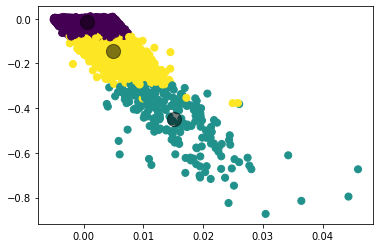

In [20]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);


In [21]:
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)


Cluster id labels for inputted data
[0 0 0 ... 0 0 0]
Centroids data
[[ 5.24193223e-04 -1.54514574e-02  3.61865871e-02 -1.24890469e-02
   1.13853617e-02  1.21355150e-02  9.70924739e-03 -6.53579598e-03
   5.55070350e-03  3.22298682e-03  4.57335543e-03  9.69900191e-03
   2.82711741e-02  4.62484593e-03 -9.97785293e-03  1.73764098e-02
   2.37612668e-02 -7.54141062e-03  2.77136802e-03 -2.12901589e-02
   4.62666014e-03  4.84420033e-03  9.61503293e-03 -2.89865546e-02
   1.41499117e-02  7.37956725e-03 -2.41241865e-02 -3.30716278e-03
  -5.50222630e-03  2.64638313e-03 -2.11110134e-02 -7.63876736e-03
   7.73296040e-03 -2.46511586e-02  2.38781795e-02  2.16425117e-02
  -1.81643199e-02  1.65661722e-02 -1.14862584e-02  2.46267155e-04
  -4.65207454e-03 -1.83244739e-02 -6.58736611e-03  1.07858954e-02
   3.98703441e-02  2.52057165e-02 -3.26974615e-02 -1.16687464e-02
   8.19554180e-03  4.05393913e-03  6.60206517e-03  1.41578298e-02
   1.18805887e-02 -1.55043770e-02 -4.39628074e-03 -1.01507837e-02
   2.08

In [23]:
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import normalize
tv_vec=TfidfVectorizer()
tfidf_tweets =tv_vec.fit_transform(df.Tweets_text)
word_features = tv_vec.get_feature_names()
tf_idf_norm = normalize(tfidf_tweets)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(data = tf_idf_array, columns=word_features)

,00,000,0000,000000,007,00gmt,00pm,01,018,03,...,zodiackiller,zombie,zombies,zone,zones,zoneton,zoom,zubaida,zuckerberg,zut
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(tfidf_tweets)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

/home/oumaima/Downloads/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


0 : the, to, covid, is, and, this, of, it, in, for, that, we, not, are, have, on, they, my, be, with, people, all, he, so, but
1 : you, the, to, if, covid, and, are, your, it, for, have, is, of, do, can, this, in, that, re, what, not, don, about, thank, get
2 : 19, covid, the, of, vaccine, in, to, for, first, and, on, as, new, after, at, cases, is, from, has, test, health, deaths, will, with, via


CPU times: user 723 ms, sys: 300 ms, total: 1.02 s
Wall time: 259 ms


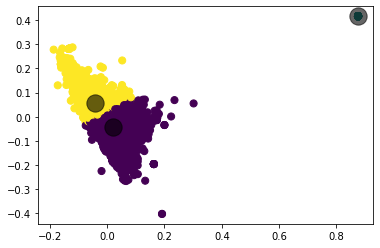

In [36]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= 3, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

CENTROID = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);